In [3]:
import sys
import os

sys.path.insert(0, '../')
import preprocess_csv as preprocess

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim.corpora.dictionary import Dictionary
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [4]:
def tokenizer(text):
    '''
    apply tokenizer
    '''
    cachedStopWords = stopwords.words("english")
    RegTok = RegexpTokenizer("[\w']{3,}")
    english_stops = set(stopwords.words('english'))
    tokens = RegTok.tokenize(text.lower())
    # stopwords 제외
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2]
    
    stemmer = PorterStemmer()
    word_token = [stemmer.stem(i) for i in words]
    
    return word_token

In [7]:
df = pd.read_csv('../data/topic2/trust_robot.csv')
papers = preprocess.extract_text(df)
texts = [tokenizer(paper) for paper in papers]

Number of initial unique words in documents: 9971
Number of unique words after removing rare and common words: 2000
Number of unique tokens: 2000
Number of documents: 1236


In [44]:
# size: 임베딩된 벡터 차원
# window: context window 크기
# min_count: 단어 최소 빈도수
# workers: 학습을 위한 프로세스 수
# sg: 0은 CBOW, 1은 Skip-Gram
model = Word2Vec(sentences=texts, vector_size=100, window=5, min_count=2, workers=-1, sg=1)

In [48]:
df = pd.read_csv('../data/topic2/topic2_TextRank.csv')

In [87]:
stemmer = PorterStemmer()
tr_word = df['keyword']
tr_vectors = []
for word in df['keyword']:
    tr_vectors.append(model.wv[stemmer.stem(word)])

len(tr_vectors)

30

In [78]:
tsne_model = TSNE(perplexity=40, n_components=2, n_iter=2500, random_state=7)

full_tsne_2 = tsne_model.fit_transform(model.wv.vectors)
full_x = full_tsne_2[:, 0]
full_y = full_tsne_2[:, 1]

tr_tsne_2 = tsne_model.fit_transform(tr_vectors)
tr_x = tr_tsne_2[:, 0]
tr_y = tr_tsne_2[:, 1]

/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


전체 단어 벡터를 그리고 그 위에 textrank 벡터를 따로 그리려고 했지만 스케일이 안맞는거 보니까 전체 단어 벡터에서 textrank 단어가 어디에 있는지 찾아야 하는듯.. 

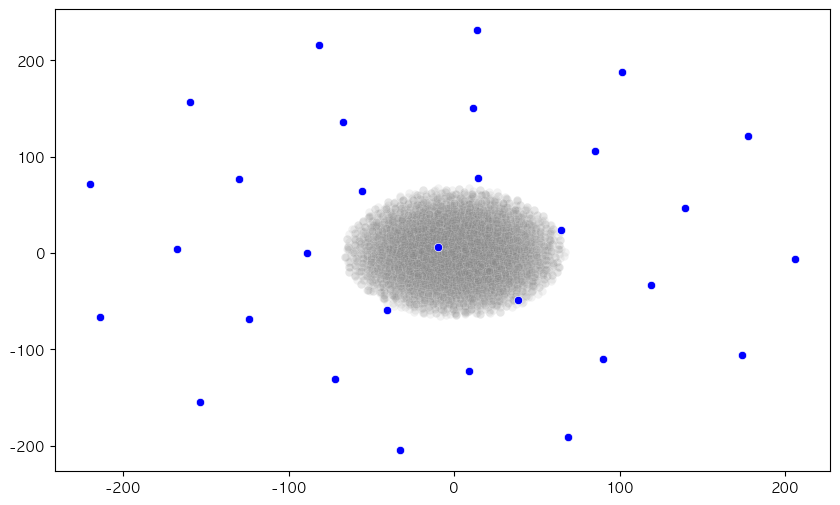

In [92]:
# 한글 깨짐
fig = plt.figure(figsize=(10, 6))
plt.rcParams['axes.unicode_minus'] = False
# if you use MacOS
plt.rcParams['font.family'] = 'AppleGothic'
# else if you use Windows
# plt.rcParams['font.family'] = 'Malgun Gothic'

fig = sns.scatterplot(
    x=full_x, y=full_y,
    legend="full",
    alpha=0.1,
    color='gray',
    )

# for i in range(len(tr_word)):
#     fig = plt.text(
#         tr_x[i], tr_y[i],
#         tr_word[i],
#         horizontalalignment='left', 
#         size='medium')
fig = sns.scatterplot(
    x=tr_x, y=tr_y,
    legend="full",
    alpha=1,
    color='b',
    )

In [63]:
from sklearn.manifold import TSNE
import seaborn as sns

def tsne_plot(model):
    "Creates and TSNE model and plots it"    
    tsne_model = TSNE(perplexity=40, n_components=2, n_iter=2500, random_state=7)
    tsne_2 = tsne_model.fit_transform(model.wv.vectors)

    x = tsne_2[:, 0]
    y = tsne_2[:, 1]
    
    # 한글 깨짐
    plt.figure(figsize=(10, 6))
    plt.rcParams['axes.unicode_minus'] = False
    # if you use MacOS
    plt.rcParams['font.family'] = 'AppleGothic'
    # else if you use Windows
    # plt.rcParams['font.family'] = 'Malgun Gothic'

    fig = sns.scatterplot(
        x=x, y=y,
        legend="full",
        alpha=0.1,
        color='gray',
    )
    plt.show()